In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

red = "#D81B60"
yellow = "#FFC107"
blue = "#1E88E5"
green = "#004D40"

from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))

In [6]:
# strudel_df = pd.read_csv('./results/strudel_results.csv')
strudel_df = pd.read_csv('../results/rowclass/strugritte_results_row_False_line_False.csv')
magritte_df = pd.read_csv('../results/rowclass/magritte_results.csv')
strugritte_df = pd.read_csv('../results/rowclass/strugritte_results_row_False_line_True.csv')

# rename strugritte column into strudel
strudel_df = strudel_df.rename(columns={"strugritte": "strudel"})
# strudel_df = pd.read_csv('./results/strugritte_results_row_True_line_False.csv')
# magritte_df = pd.read_csv('./results/strugritte_results_row_False_line_True.csv')
# strugritte_df = pd.read_csv('./results/strugritte_results_row_True_line_True.csv')

# df = pd.stack([strudel_df, magritte_df, strugritte_df])
df = pd.merge(strudel_df, magritte_df, on="measure")
df = pd.merge(df, strugritte_df, on="measure")
res = df.set_index("measure")*100
# std = res.groupby(lambda x: x.split("_")[0], axis=1).std(numeric_only=True)
# res = res.groupby(lambda x: x.split("_")[0], axis=1).mean(numeric_only=True)
res = res.transpose()

display(res)

measure,mendeley_data_f1,mendeley_header_f1,mendeley_metadata_f1,mendeley_group_f1,mendeley_derived_f1,mendeley_notes_f1,mendeley_accuracy,mendeley_macro_avg,troy_data_f1,troy_header_f1,...,cius_accuracy,cius_macro_avg,govuk_data_f1,govuk_header_f1,govuk_metadata_f1,govuk_group_f1,govuk_derived_f1,govuk_notes_f1,govuk_accuracy,govuk_macro_avg
strudel,95.862210,41.904762,55.899198,5.405405,22.222222,45.333333,90.594595,44.437855,94.587926,89.138577,...,94.842271,68.071714,93.508229,71.544715,52.579853,67.353952,48.377581,91.428571,87.856269,70.798817
magritte_0,77.892122,24.089636,37.158470,0.000000,1.751313,1.847575,60.912298,23.789853,9.387223,66.106443,...,64.764788,80.639182,64.910114,63.428571,93.738602,85.937500,24.972046,93.551913,62.987285,71.089791
strugritte,94.435580,38.554217,38.421053,6.896552,30.769231,13.461538,88.702703,37.089695,94.137187,83.175803,...,96.727129,87.310793,97.199320,95.218295,95.310668,88.268156,60.349127,97.657394,95.372025,89.000494


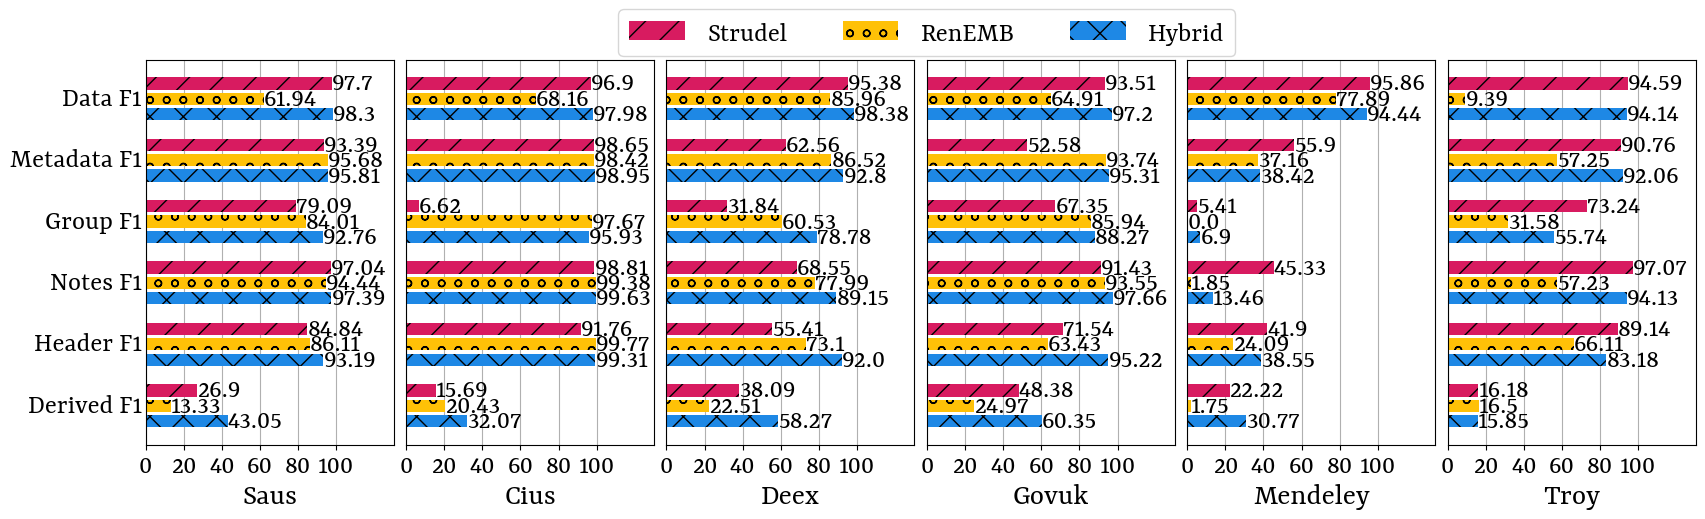

In [8]:
from matplotlib.patches import Patch

plt.rcParams['font.family'] = 'Rasa'
labelsize = 20

colors = [red, yellow, blue]
patterns = ['/', 'o', 'x']

def plot_bar(ax, title, bars):
  ax.grid(zorder=-10)
  ax.set_axisbelow(True)

  n_rows = len(bars[0])
  positions = [np.arange(n_rows)+((n_rows+1)*idx) for idx in range(len(bars))]
  for j,bar in enumerate(bars):
    ax.barh(positions[j], bar, color=colors, hatch=patterns, ) #xerr=std["strudel"][b.name]

  # write numbers on top of the bars
  ypad =0
  xpad=.02
  for j, b in enumerate(bars):
    for i, v in enumerate(b):
      ax.text(v+xpad, (j*(n_rows+1))+i+ypad, str(round(v, 2)), color='black', size=labelsize, va='center')


  # only have the corresponding x labels corresponding to the middle bar of each plot
  ax.set_yticks([])
  #
  ax.set_xlabel(title, size=labelsize+2);
  ticks = [0, 20, 40, 60, 80, 100]
  ax.set_xticks(ticks=ticks, labels=ticks,size=labelsize);
  ax.set_xlim(0, 130)
  # plt.title("Dialect detection results", size=labelsize+2);

fig = plt.figure(figsize=(20, 5))
gs = fig.add_gridspec(nrows=1,ncols=6, wspace=0.05)
axs = gs.subplots(sharey=True)

# datasets = set([x.split("_")[0] for x in res.columns])
datasets = ["saus", "cius", "deex","govuk","mendeley","troy"]

# measures = set([x.split("_")[1] for x in res.columns if "f1" in x])
measures = ["data","metadata", "group", "notes", "header", "derived"]
for idx, ds in enumerate(datasets):
  bars = [res[f"{ds}_{m}_f1"] for m in measures]
  plot_bar(axs[idx], ds.title(), bars)

axs[0].invert_yaxis()

n_rows = len(bars[0])
xpoint = -2
for idx,m in enumerate(measures):
  axs[0].text(xpoint, 1+((n_rows+1)*idx), m.title()+" F1", ha='right', va='center', size=labelsize)

# add a legend
custom_bars = [
              Patch(facecolor=colors[0], hatch=patterns[0]),
              Patch(facecolor=colors[1], hatch=patterns[1]),
              Patch(facecolor=colors[2], hatch=patterns[2]),
              ]

axs[1].legend(handles=custom_bars,
              labels = ["Strudel", "RenEMB", "Hybrid"], #[x.capitalize() for x in res.index],
              loc='center',
              bbox_to_anchor=(2.1, 1.07),
              ncols=3,
              fontsize=labelsize)

plt.savefig('lineclass_new_results.png', dpi=300, bbox_inches='tight')

In [6]:
# mendeley_df = pd.read_csv("D:\\HPI\\docker\\csv_bert\\experiments\\finetune_lineclass\\strugritte_row_False_line_True_mendeley_results.csv")
# troy_df = pd.read_csv("D:\\HPI\\docker\\csv_bert\\experiments\\finetune_lineclass\\strugritte_row_False_line_True_troy_results.csv")

mendeley_df = pd.read_csv("D:\\HPI\\docker\\csv_bert\\experiments\\finetune_lineclass\\magritte_mendeley_results.csv")
troy_df = pd.read_csv("D:\\HPI\\docker\\csv_bert\\experiments\\finetune_lineclass\\magritte_troy_results.csv")

# mendeley_df = mendeley_df[mendeley_df["label"]!="empty"]
troy_df = troy_df[troy_df["label"]!="empty"]

len(mendeley_df)


5293

Mendeley
F1 weighted:  0.41594261052469156
F1 macro:  0.14881392098736262
F1 micro:  0.3442282259588135
Per class F1 [0.62494854 0.00902256 0.         0.01398601 0.0879397  0.27086614
 0.0349345 ]
Troy
F1 weighted:  0.29395031483857753
F1 macro:  0.36999408371662484
F1 micro:  0.3052978150254415
Per class F1 [0.19500205 0.16862745 0.15686275 0.66666667 0.50064185 0.53216374]


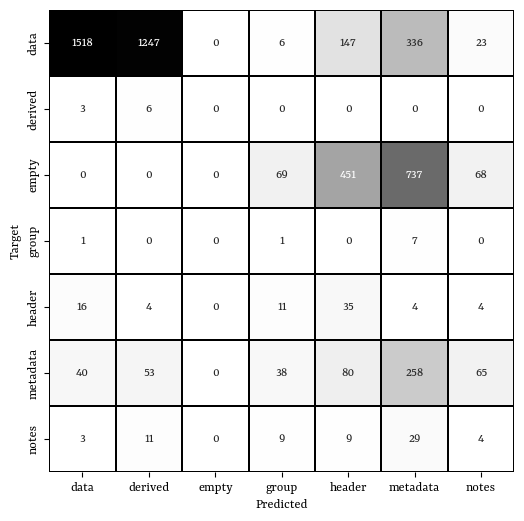

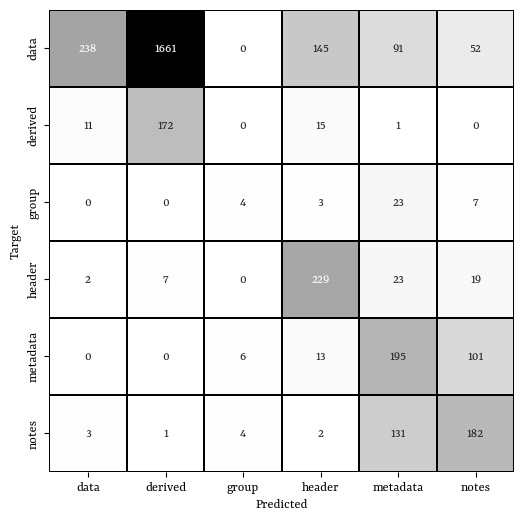

In [7]:
import sklearn.metrics
import seaborn as sns
import matplotlib.pyplot as plt

def plot_cm(df):
#plot a confusion matrix between the predicted_delimiter and the target_delimiter columns
    y_pred = df[f"predicted"]
    y_true = df[f"label"]
    labels = sorted(y_true.unique())
    matrix = sklearn.metrics.confusion_matrix(y_true, y_pred, labels=labels)

    print("F1 weighted: ", sklearn.metrics.f1_score(y_true, y_pred, average="weighted"))
    print("F1 macro: ", sklearn.metrics.f1_score(y_true, y_pred, average="macro"))
    print("F1 micro: ", sklearn.metrics.f1_score(y_true, y_pred, average="micro"))
    print("Per class F1", sklearn.metrics.f1_score(y_true, y_pred, average=None))

    # draw matrix in matplotlib
    fig, ax  = plt.subplots(figsize=(6, 6))
    # im = ax.matshow(matrix, cmap=plt.cm.Blues, alpha)
    sns.heatmap(matrix, 
                cmap='binary', 
                # vmin=0,
                # vmax=100,
                linecolor='black',
                linewidths=.25,
                robust=True,
                xticklabels=labels, 
                yticklabels=labels, 
                annot=True, 
                fmt='d', 
                cbar=False, 
                )

    ax.set_xlabel("Predicted")
    ax.set_ylabel("Target")

print("Mendeley")
plot_cm(mendeley_df)

print("Troy")
plot_cm(troy_df)



In [19]:
mendeley_df.columns


Index(['Unnamed: 0', 'filename', 'line_number', 'data_prob', 'derived_prob',
       'group_prob', 'header_prob', 'metadata_prob', 'notes_prob', 'label',
       'predicted'],
      dtype='object')